In [1]:
from io import open
import numpy as np
from conllu import parse_incr
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import csv
import pandas as pd

In [2]:
path = r'D:/nerus_lenta.conllu/nerus_lenta.conllu'

In [29]:
data_file = open(path, "r", encoding="utf-8")
k = 0
for tokenlist in parse_incr(data_file):
    print(tokenlist)
    print('\n\n')
    k += 1
    if k==5:
        break
data_file.close()

TokenList<Вице-премьер, по, социальным, вопросам, Татьяна, Голикова, рассказала, ,, в, каких, регионах, России, зафиксирована, наиболее, высокая, смертность, от, рака, ,, сообщает, РИА, Новости, ., metadata={newdoc id: "0", sent_id: "0_0", text: "Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости."}>



TokenList<По, словам, Голиковой, ,, чаще, всего, онкологические, заболевания, становились, причиной, смерти, в, Псковской, ,, Тверской, ,, Тульской, и, Орловской, областях, ,, а, также, в, Севастополе, ., metadata={sent_id: "0_1", text: "По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе."}>



TokenList<Вице-премьер, напомнила, ,, что, главные, факторы, смертности, в, России, —, рак, и, болезни, системы, кровообращения, ., metadata={sent_id: "0_2", text: "Вице-премьер

In [44]:
lengths = []
with open(path, "r", encoding="utf-8") as f:
    for tokenlist in tqdm(parse_incr(f)):
        lengths.append(len(tokenlist))

0it [00:00, ?it/s]

In [46]:
max(lengths)

249

In [47]:
min(lengths)

1

In [126]:
ttt = []
with open(path, "r", encoding="utf-8") as f:
    for tokenlist in tqdm(parse_incr(f)):
        if len(tokenlist) > 200:
            ttt.append(tokenlist)
            if len(ttt) > 5:
                break

0it [00:00, ?it/s]

In [138]:
ttt[4].metadata['text']

'Чтобы не прослыть последним лохом,По себе людей я впредь не меряю.Раз на русском языке петь плохо,Буду слушать я теперь Валерию.Там все чистенько, ну, прям как в каземате,И во славу, несомненно, божию.У меня ж как в жизни — мат на мате,Да еще с моей пропитой рожею.Пусть настигнет кара многократная.Каюсь, был неправ, что пел, как слышится.Забираю все слова обратно я.Пусть камыш здесь больше не колышется Ранее в воскресенье Пригожин раскритиковал фанатов «Ленинграда» за то, что они вместе со Шнуровым исполняют нецензурные тексты песен, и назвал их лохами.'

In [131]:
len(ttt[0])

123

In [52]:
sent_len = np.array(lengths, dtype=np.uint8)

In [53]:
# with open('lengths.npy', 'wb') as f:
#     np.save(f, sent_len)

In [57]:
np.argmax(sent_len)

7488145

In [58]:
np.sort(sent_len)[:]

array([  1,   1,   1, ..., 226, 243, 249], dtype=uint8)

In [81]:
x = np.arange(1, 250)

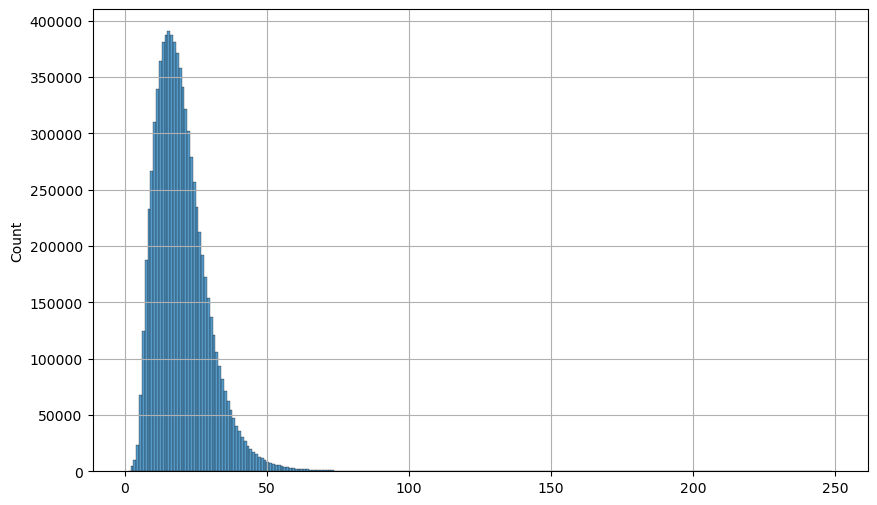

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(sent_len, bins=249)
plt.grid()
# plt.plot(x, poisson.pmf(x, np.mean(sent_len)))

In [116]:
len(np.where(sent_len < 4)[0])

14962

In [172]:
data_file = open(path, "r", encoding="utf-8")

In [190]:
def data_gen():
    with open(path, "r", encoding="utf-8") as f:
        for tokenlist in parse_incr(f):
            if len(tokenlist) != 1:
                yield tokenlist
            else:
                continue

In [13]:
with open(path, "r", encoding="utf-8") as f:
        for tokenlist in parse_incr(f):
            if len(tokenlist) != 1:
                break

In [194]:
next(data_gen())

TokenList<Вице-премьер, по, социальным, вопросам, Татьяна, Голикова, рассказала, ,, в, каких, регионах, России, зафиксирована, наиболее, высокая, смертность, от, рака, ,, сообщает, РИА, Новости, ., metadata={newdoc id: "0", sent_id: "0_0", text: "Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости."}>

In [191]:
for k in data_gen():
    print(k)

TokenList<Вице-премьер, по, социальным, вопросам, Татьяна, Голикова, рассказала, ,, в, каких, регионах, России, зафиксирована, наиболее, высокая, смертность, от, рака, ,, сообщает, РИА, Новости, ., metadata={newdoc id: "0", sent_id: "0_0", text: "Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости."}>
TokenList<По, словам, Голиковой, ,, чаще, всего, онкологические, заболевания, становились, причиной, смерти, в, Псковской, ,, Тверской, ,, Тульской, и, Орловской, областях, ,, а, также, в, Севастополе, ., metadata={sent_id: "0_1", text: "По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе."}>
TokenList<Вице-премьер, напомнила, ,, что, главные, факторы, смертности, в, России, —, рак, и, болезни, системы, кровообращения, ., metadata={sent_id: "0_2", text: "Вице-премьер напом

TokenList<Это, свинство, », ,, —, сказал, Гайдулян, ., metadata={sent_id: "63_12", text: "Это свинство», — сказал Гайдулян."}>
TokenList<Затем, он, указал, на, надпись, «, быдло, », ,, нарисованную, для, декораций, спектакля, ., metadata={sent_id: "63_13", text: "Затем он указал на надпись «быдло», нарисованную для декораций спектакля."}>
TokenList<Руководство, театра, пояснило, ,, что, некоторые, зрители, во, время, антракта, выпили, слишком, много, шампанского, и, в, ходе, второго, акта, начали, громко, разговаривать, ., metadata={sent_id: "63_14", text: "Руководство театра пояснило, что некоторые зрители во время антракта выпили слишком много шампанского и в ходе второго акта начали громко разговаривать."}>
TokenList<С, 2019, года, федеральный, долг, США, и, бремя, его, обслуживания, достигнут, исторически, рекордных, уровней, ., metadata={newdoc id: "64", sent_id: "64_0", text: "С 2019 года федеральный долг США и бремя его обслуживания достигнут исторически рекордных уровней."}>
To

TokenList<Ее, приближение, вызывает, агрессию, у, одной, из, коров, ., metadata={sent_id: "132_4", text: "Ее приближение вызывает агрессию у одной из коров."}>
TokenList<Она, подбегает, к, мотоциклистке, ,, подпрыгивает, и, сбивает, ее, задними, копытами, ., metadata={sent_id: "132_5", text: "Она подбегает к мотоциклистке, подпрыгивает и сбивает ее задними копытами."}>
TokenList<Женщина, падает, ,, корчась, от, боли, ,, проезжавший, мимо, на, мотоцикле, мужчина, бросается, к, ней, на, помощь, ,, а, животное, убегает, в, поле, ., metadata={sent_id: "132_6", text: "Женщина падает, корчась от боли, проезжавший мимо на мотоцикле мужчина бросается к ней на помощь, а животное убегает в поле."}>
TokenList<По, данным, издания, ,, женщине, не, потребовалась, помощь, врачей, ,, и, она, не, стала, жаловаться, в, полицию, на, пастуха, ., metadata={sent_id: "132_7", text: "По данным издания, женщине не потребовалась помощь врачей, и она не стала жаловаться в полицию на пастуха."}>
TokenList<Видео, 

TokenList<Основанием, стало, его, поведение, во, время, акции, в, защиту, 31-й, статьи, конституции, 31, декабря, 2009, года, ., metadata={sent_id: "189_9", text: "Основанием стало его поведение во время акции в защиту 31-й статьи конституции 31 декабря 2009 года."}>
TokenList<Мохнаткин, тогда, также, был, арестован, ,, осужден, на, 2,5, года, заключения, за, нападение, на, милиционеров, ,, а, затем, помилован, ., metadata={sent_id: "189_10", text: "Мохнаткин тогда также был арестован, осужден на 2,5 года заключения за нападение на милиционеров, а затем помилован."}>
TokenList<«, Башнефть, », успешно, интегрировалась, в, состав, группы, «, Роснефть, », ., metadata={newdoc id: "190", sent_id: "190_0", text: "«Башнефть» успешно интегрировалась в состав группы «Роснефть»."}>
TokenList<Такой, вывод, следует, из, доклада, председателя, правления, «, Башнефти, », Андрея, Шишкина, ,, озвученного, общему, собранию, акционеров, компании, ,, копия, которого, поступила, в, распоряжение, редакции,

TokenList<В, Анкаре, скоростной, поезд, врезался, в, путепровод, ., metadata={newdoc id: "251", sent_id: "251_0", text: "В Анкаре скоростной поезд врезался в путепровод."}>
TokenList<Об, этом, сообщает, турецкий, телеканал, NTV, ., metadata={sent_id: "251_1", text: "Об этом сообщает турецкий телеканал NTV."}>
TokenList<Точное, число, пострадавших, пока, неизвестно, ., metadata={sent_id: "251_2", text: "Точное число пострадавших пока неизвестно."}>
TokenList<По, данным, местных, СМИ, ,, в, результате, аварии, имеются, многочисленные, раненые, ., metadata={sent_id: "251_3", text: "По данным местных СМИ, в результате аварии имеются многочисленные раненые."}>
TokenList<После, столкновения, два, вагона, поезда, сошли, с, рельсов, ., metadata={sent_id: "251_4", text: "После столкновения два вагона поезда сошли с рельсов."}>
TokenList<На, месте, происшествия, работают, врачи, и, пожарные, ., metadata={sent_id: "251_5", text: "На месте происшествия работают врачи и пожарные."}>
TokenList<Причи

TokenList<UPD, :, Гитарист, группировки, Дмитрий, Гугучкин, в, эфире, НСН, сообщил, ,, что, что, ничего, не, знает, про, новые, финансовые, полномочия, жены, Сергея, Шнурова, ., metadata={sent_id: "313_16", text: "UPD: Гитарист группировки Дмитрий Гугучкин в эфире НСН сообщил, что что ничего не знает про новые финансовые полномочия жены Сергея Шнурова."}>
TokenList<Около, шести, тысяч, детей, и, подростков, в, России, употребляют, наркотики, ,, и, смертность, от, них, растет, ., metadata={newdoc id: "314", sent_id: "314_0", text: "Около шести тысяч детей и подростков в России употребляют наркотики, и смертность от них растет."}>
TokenList<Об, этом, сообщает, «, Интерфакс, », со, ссылкой, на, заявление, генерального, прокурора, Юрия, Чайки, во, время, заседания, коллегии, ведомства, ,, посвященного, профилактике, наркомании, среди, несовершеннолетних, ., metadata={sent_id: "314_1", text: "Об этом сообщает «Интерфакс» со ссылкой на заявление генерального прокурора Юрия Чайки во время зас

TokenList<В, Москве, назвали, действия, украинской, стороны, провокацией, ., metadata={sent_id: "368_7", text: "В Москве назвали действия украинской стороны провокацией."}>
TokenList<Было, возбуждено, уголовное, дело, о, нарушении, государственной, границы, ,, 24, украинских, моряка, ,, находившиеся, на, борту, трех, кораблей, ,, арестованы, на, два, месяца, ., metadata={sent_id: "368_8", text: "Было возбуждено уголовное дело о нарушении государственной границы, 24 украинских моряка, находившиеся на борту трех кораблей, арестованы на два месяца."}>
TokenList<В, Киеве, сочли, действия, Москвы, «, актом, военной, агрессии, », ,, в, ряде, областей, страны, ,, граничащих, с, Россией, и, Приднестровьем, ,, было, введено, военное, положение, ., metadata={sent_id: "368_9", text: "В Киеве сочли действия Москвы «актом военной агрессии», в ряде областей страны, граничащих с Россией и Приднестровьем, было введено военное положение."}>
TokenList<30, ноября, власти, страны, ограничили, въезд, на, т

TokenList<«, По, приказу, министра, [, обороны, Джеймса, ], Мэттиса, США, установили, наблюдательные, посты, в, северо-восточном, приграничном, регионе, Сирии, для, решения, проблем, безопасности, нашего, союзника, по, НАТО, —, Турции, », ,, —, отметил, он, ., metadata={sent_id: "431_2", text: "«По приказу министра [обороны Джеймса] Мэттиса США установили наблюдательные посты в северо-восточном приграничном регионе Сирии для решения проблем безопасности нашего союзника по НАТО — Турции», — отметил он."}>
TokenList<Ни, количество, подобных, постов, ,, ни, их, точное, месторасположение, не, указываются, ., metadata={sent_id: "431_3", text: "Ни количество подобных постов, ни их точное месторасположение не указываются."}>
TokenList<Также, не, сообщается, о, числе, наблюдателей, ,, которые, на, них, размещены, ., metadata={sent_id: "431_4", text: "Также не сообщается о числе наблюдателей, которые на них размещены."}>
TokenList<Как, отмечает, Sputnik, ,, ранее, министр, национальной, обороны

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
with open('lengths.npy', 'rb') as f:
    sent_len = np.load(f)

In [30]:
len(sent_len)

8152696

In [10]:
np.arange(101, 250, dtype=np.uint8)

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249], dtype=uint8)

In [16]:
header = ['sentence_id', 'word', 'tag']

r = np.arange(101, 250, dtype=np.uint8)

with open(r'D:/nerus_lenta.conllu/words_all.csv', 'w', encoding='utf-8', newline='') as f_csv:
    writer = csv.writer(f_csv)
    writer.writerow(header)
    s_n = 1

    with open(path, "r", encoding="utf-8") as f:
        p_bar = tqdm(range(8152696))
        for tokenlist in parse_incr(f):
#             if len(tokenlist) == 1 or len(tokenlist) in r:
#                 continue
            for token in tokenlist:
                writer.writerow([s_n, token['form'], token['misc']['Tag']])
            s_n += 1
            p_bar.update(1)
    p_bar.close()

  0%|          | 0/8152696 [00:00<?, ?it/s]

In [18]:
tokenlist[1]

{'id': 2,
 'form': 'Давайте',
 'lemma': '_',
 'upos': 'VERB',
 'xpos': None,
 'feats': {'Aspect': 'Imp',
  'Mood': 'Imp',
  'Number': 'Plur',
  'Person': '2',
  'VerbForm': 'Fin',
  'Voice': 'Act'},
 'head': 0,
 'deprel': 'root',
 'deps': None,
 'misc': {'Tag': 'O'}}

In [17]:
%%time
df = pd.read_csv(r'D:/nerus_lenta.conllu/words_1-100.csv')

Wall time: 59.3 s


In [18]:
df

,sentense #,word,tag
0,1,Вице-премьер,O
1,1,по,O
2,1,социальным,O
3,1,вопросам,O
4,1,Татьяна,B-PER
...,...,...,...
159767547,8150004,прокомментировал,O
159767548,8150004,Коржаков,B-PER
159767549,8150004,действия,O
159767550,8150004,Скуратова,B-PER


In [19]:
%%time
df['tag'].unique()

Wall time: 4.21 s


array(['O', 'B-PER', 'I-PER', 'B-LOC', 'B-ORG', 'I-ORG', 'I-LOC'],
      dtype=object)

In [20]:
%%time
df[df['word']=='.']

Wall time: 8.14 s


,sentense #,word,tag
22,1,.,O
48,2,.,O
64,3,.,O
83,4,.,O
97,5,.,O
...,...,...,...
159767478,8150000,.,O
159767502,8150001,.,O
159767511,8150002,.,O
159767534,8150003,.,O


In [21]:
tags = {
    'O': 0,
    'B-PER': 1,
    'I-PER': 2,
    'B-ORG': 3,
    'I-ORG': 4,
    'B-LOC': 5,
    'I-LOC': 6
}

In [22]:
tags_inv = {
    0: 'O',
    1: 'B-PER',
    2: 'I-PER',
    3: 'B-ORG',
    4: 'I-ORG',
    5: 'B-LOC',
    6: 'I-LOC'
}

In [23]:
%%time
df.tag = df.tag.map(tags)

Wall time: 6.28 s


In [24]:
df.tag.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [25]:
df.to_csv('words_tagged_1-100.csv', index=False)

In [39]:
import tensorflow_hub as hub
elmo = tf.saved_model.load(r'C:\Users\Egor\Desktop\python\VKR\elmo_ru-news_wmt11-16_1.5M_steps')

In [7]:
len(np.where(sent_len < 100)[0]) / len(sent_len)

0.9997383687555625

In [115]:
with open(path, "r", encoding="utf-8") as f:
        for tokenlist in parse_incr(f):
            if len(tokenlist) > 150:
                break
tokenlist

KeyboardInterrupt: 